In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 16.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/images.zip' -d '/content/images'
!unzip '/content/drive/MyDrive/labels.zip' -d '/content/labels'

Streaming output truncated to the last 5000 lines.
  inflating: /content/labels/image_1976.txt  
  inflating: /content/labels/image_1941.txt  
  inflating: /content/labels/image_396.txt  
  inflating: /content/labels/image_6011.txt  
  inflating: /content/labels/image_7478.txt  
  inflating: /content/labels/image_5627.txt  
  inflating: /content/labels/image_6694.txt  
  inflating: /content/labels/image_11495.txt  
  inflating: /content/labels/image_2844.txt  
  inflating: /content/labels/image_8733.txt  
  inflating: /content/labels/image_2093.txt  
  inflating: /content/labels/image_1162.txt  
  inflating: /content/labels/image_7706.txt  
  inflating: /content/labels/image_1400.txt  
  inflating: /content/labels/image_10149.txt  
  inflating: /content/labels/image_7527.txt  
  inflating: /content/labels/image_9628.txt  
  inflating: /content/labels/image_10909.txt  
  inflating: /content/labels/image_2589.txt  
  inflating: /content/labels/image_7705.txt  
  inflating: /content/label

In [ ]:
import os
import shutil
import random

def get_files_in_dir(directory, extensions):
    """
    Retrieve all files in a directory with the specified extensions.
    """
    files = []
    for root, _, filenames in os.walk(directory):
        for filename in filenames:
            if filename.lower().endswith(extensions):
                files.append(os.path.join(root, filename))
    return files


def split_dataset(image_dir, label_dir, output_dir, split_ratio=0.8):
    """
    Split the dataset into training and validation sets,
    copying images and labels into YOLO-compatible folder structures.
    """
    # Retrieve images and labels
    image_files = sorted(get_files_in_dir(image_dir, ('.png', '.jpg', '.jpeg')))
    label_files = sorted(get_files_in_dir(label_dir, ('.txt',)))

    print(f"Number of image files: {len(image_files)}")
    print(f"Number of label files: {len(label_files)}")

    # Ensure images and labels match
    if len(image_files) != len(label_files):
        raise ValueError("Number of image files and label files do not match")

    # Pair images and labels by filename without extensions
    image_basenames = [os.path.splitext(os.path.basename(img))[0] for img in image_files]
    label_basenames = [os.path.splitext(os.path.basename(lbl))[0] for lbl in label_files]

    if set(image_basenames) != set(label_basenames):
        raise ValueError("Image and label filenames do not match")

    # Pair and shuffle
    combined = list(zip(image_files, label_files))
    random.shuffle(combined)
    image_files, label_files = zip(*combined)

    # Calculate split index
    split_index = int(len(image_files) * split_ratio)
    train_images, val_images = image_files[:split_index], image_files[split_index:]
    train_labels, val_labels = label_files[:split_index], label_files[split_index:]

    # Define output directories
    dirs = {
        'train_images': os.path.join(output_dir, 'train', 'images'),
        'train_labels': os.path.join(output_dir, 'train', 'labels'),
        'val_images': os.path.join(output_dir, 'val', 'images'),
        'val_labels': os.path.join(output_dir, 'val', 'labels')
    }

    for dir_path in dirs.values():
        os.makedirs(dir_path, exist_ok=True)

    # Copy training files
    for img, lbl in zip(train_images, train_labels):
        shutil.copy(img, os.path.join(dirs['train_images'], os.path.basename(img)))
        shutil.copy(lbl, os.path.join(dirs['train_labels'], os.path.basename(lbl)))

    # Copy validation files
    for img, lbl in zip(val_images, val_labels):
        shutil.copy(img, os.path.join(dirs['val_images'], os.path.basename(img)))
        shutil.copy(lbl, os.path.join(dirs['val_labels'], os.path.basename(lbl)))

    print(f"✅ Dataset split completed successfully!")
    print(f"🔹 Training set: {len(train_images)} images, {len(train_labels)} labels")
    print(f"🔹 Validation set: {len(val_images)} images, {len(val_labels)} labels")


# Example usage
if __name__ == "__main__":
    image_dir = r"/content/images"
    label_dir = r"/content/labels"
    output_dir = r"/content/dataset"
    split_dataset(image_dir, label_dir, output_dir)


Number of image files: 11505
Number of label files: 11505
✅ Dataset split completed successfully!
🔹 Training set: 9204 images, 9204 labels
🔹 Validation set: 2301 images, 2301 labels


In [ ]:
from ultralytics import YOLO
model = YOLO('yolo11x.pt')

In [ ]:

# Train the model
his = model.train(
    data='/content/data.yaml',  # Path to dataset config
    epochs=30,                  # Number of training epochs
    imgsz=416,                  # Image size
    batch=16,
    device='cuda'               # Explicitly set the device to GPU 0 - this was 'cuda'
)

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=/content/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

train: Scanning /content/dataset/train/labels.cache... 9204 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9204/9204 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/val/labels.cache... 2301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2301/2301 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      9.08G     0.2286     0.4049     0.8335         81        416: 100%|██████████| 576/576 [06:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:37<00:00,  1.92it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      8.72G     0.1463     0.1583     0.7877        125        416: 100%|██████████| 576/576 [05:56<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  2.00it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.71G      0.141     0.1497     0.7831        141        416: 100%|██████████| 576/576 [05:48<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.02it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.68G     0.1231     0.1326     0.7817        134        416: 100%|██████████| 576/576 [05:46<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.03it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      8.71G     0.1137     0.1251     0.7789         74        416: 100%|██████████| 576/576 [05:45<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.02it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.71G     0.1037     0.1159     0.7791        121        416: 100%|██████████| 576/576 [05:45<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.01it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       8.7G    0.09921     0.1117     0.7767        129        416: 100%|██████████| 576/576 [05:45<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.02it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.73G    0.09384     0.1064     0.7768        145        416: 100%|██████████| 576/576 [05:46<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.01it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       8.7G    0.08934     0.1034     0.7753        126        416: 100%|██████████| 576/576 [05:44<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.02it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      8.64G    0.08534    0.09913     0.7756        194        416: 100%|██████████| 576/576 [05:45<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.03it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.68G    0.08136    0.09593     0.7742        114        416: 100%|██████████| 576/576 [05:46<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.01it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.68G    0.07694     0.0913     0.7749        136        416: 100%|██████████| 576/576 [05:44<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.02it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      8.71G    0.07599     0.0903     0.7742         66        416: 100%|██████████| 576/576 [05:44<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.05it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.68G    0.07319    0.08661     0.7745        111        416: 100%|██████████| 576/576 [05:42<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.03it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      8.69G    0.06971    0.08365     0.7751        129        416: 100%|██████████| 576/576 [05:45<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.04it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      8.73G     0.0679     0.0818     0.7751        101        416: 100%|██████████| 576/576 [05:44<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.00it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      8.69G    0.06795    0.08093     0.7735         80        416: 100%|██████████| 576/576 [05:45<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:34<00:00,  2.06it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      8.71G    0.06606    0.08007     0.7737        132        416: 100%|██████████| 576/576 [05:45<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.03it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      8.73G    0.06433    0.07706     0.7735         69        416: 100%|██████████| 576/576 [05:45<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.01it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      8.88G    0.06348     0.0746     0.7732        105        416: 100%|██████████| 576/576 [05:45<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.03it/s]

                   all       2301      50848          1          1      0.995      0.995


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      8.69G    0.05889    0.06738     0.7705         84        416: 100%|██████████| 576/576 [05:42<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.03it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      8.69G    0.05678    0.06375     0.7702         74        416: 100%|██████████| 576/576 [05:41<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.01it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      8.69G    0.05637    0.06265     0.7726         95        416: 100%|██████████| 576/576 [05:42<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.03it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      8.69G    0.05343    0.05984     0.7695         76        416: 100%|██████████| 576/576 [05:40<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.03it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       8.7G    0.05175    0.05704     0.7695         79        416: 100%|██████████| 576/576 [05:41<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.01it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       8.7G     0.0494    0.05296     0.7699         54        416: 100%|██████████| 576/576 [05:41<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.02it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       8.7G    0.04689    0.05013     0.7699         53        416: 100%|██████████| 576/576 [05:33<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.04it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.69G    0.04489    0.04864     0.7704        105        416: 100%|██████████| 576/576 [05:32<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:34<00:00,  2.07it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       8.7G        inf    0.04573     0.7685         78        416: 100%|██████████| 576/576 [05:32<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:34<00:00,  2.06it/s]

                   all       2301      50848          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      8.72G    0.04207    0.04475     0.7696         80        416: 100%|██████████| 576/576 [05:33<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.05it/s]

                   all       2301      50848          1          1      0.995      0.995



30 epochs completed in 3.277 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 114.4MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11x summary (fused): 464 layers, 56,840,884 parameters, 0 gradients, 194.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:44<00:00,  1.64it/s]


                   all       2301      50848          1          1      0.995      0.995
            black-pawn       2242      12873          1          1      0.995      0.995
            black-rook       1951       3415          1          1      0.995      0.995
          black-knight       1681       2604          1          1      0.995      0.995
          black-bishop       1693       2817          1          1      0.995      0.995
           black-queen       1407       1408          1          1      0.995      0.995
            black-king       2301       2301          1          1      0.995      0.995
            white-pawn       2244      12808          1          1      0.995      0.995
            white-rook       1916       3356          1          1      0.995      0.995
          white-knight       1723       2718          1          1      0.995      0.995
          white-bishop       1772       2830          1          1      0.995      0.995
           white-quee

In [ ]:
import cv2
img = cv2.imread('/content/images/image_1.png')
img.shape

(416, 416, 3)

In [ ]:
model.save('/content/drive/MyDrive/chessDetection.pt')

In [ ]:
res = model.predict(img)


0: 416x416 8 black-pawns, 2 black-rooks, 2 black-knights, 2 black-bishops, 1 black-queen, 1 black-king, 8 white-pawns, 2 white-rooks, 2 white-knights, 2 white-bishops, 1 white-queen, 1 white-king, 76.9ms
Speed: 1.4ms preprocess, 76.9ms inference, 5.1ms postprocess per image at shape (1, 3, 416, 416)


In [ ]:
res

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'black-pawn', 1: 'black-rook', 2: 'black-knight', 3: 'black-bishop', 4: 'black-queen', 5: 'black-king', 6: 'white-pawn', 7: 'white-rook', 8: 'white-knight', 9: 'white-bishop', 10: 'white-queen', 11: 'white-king'}
 obb: None
 orig_img: array([[[158, 206, 255],
         [158, 206, 255],
         [158, 206, 255],
         ...,
         [ 71, 139, 209],
         [ 71, 139, 209],
         [ 71, 139, 209]],
 
        [[158, 206, 255],
         [158, 206, 255],
         [158, 206, 255],
         ...,
         [ 71, 139, 209],
         [ 71, 139, 209],
         [ 71, 139, 209]],
 
        [[158, 206, 255],
         [158, 206, 255],
         [158, 206, 255],
         ...,
         [ 71, 139, 209],
         [ 71, 139, 209],
         [ 71, 139, 209]],
 
        ...,
 
        [[ 71, 139, 209],
         [ 71, 139, 209],
         [ 71, 139, 209],
  

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/chessDetection.pt')

In [ ]:
model.info()

YOLO11x summary: 631 layers, 56,887,636 parameters, 0 gradients, 195.5 GFLOPs


(631, 56887636, 0, 195.5200512)

In [ ]:
import cv2
img = cv2.imread('/content/testing_img3.jpeg')
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.resize(img, (416, 416))
results = model([img])
results


0: 416x416 13 white-pawns, 3 white-rooks, 3 white-knights, 4 white-bishops, 3 white-queens, 1 white-king, 1662.1ms
Speed: 3.0ms preprocess, 1662.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'black-pawn', 1: 'black-rook', 2: 'black-knight', 3: 'black-bishop', 4: 'black-queen', 5: 'black-king', 6: 'white-pawn', 7: 'white-rook', 8: 'white-knight', 9: 'white-bishop', 10: 'white-queen', 11: 'white-king'}
 obb: None
 orig_img: array([[[ 53,  57,  58],
         [ 53,  57,  58],
         [ 53,  57,  58],
         ...,
         [ 53,  57,  58],
         [ 53,  57,  58],
         [ 53,  57,  58]],
 
        [[ 53,  57,  58],
         [ 53,  57,  58],
         [ 53,  57,  58],
         ...,
         [ 53,  57,  58],
         [ 53,  57,  58],
         [ 53,  57,  58]],
 
        [[ 54,  58,  59],
         [ 54,  58,  59],
         [121, 135, 135],
         ...,
         [ 54,  58,  59],
         [ 54,  58,  59],
         [ 54,  58,  59]],
 
        ...,
 
        [[ 76,  80,  81],
         [ 76,  80,  81],
         [ 76,  80,  81],
  

In [ ]:
print(len(results[0].boxes))

27


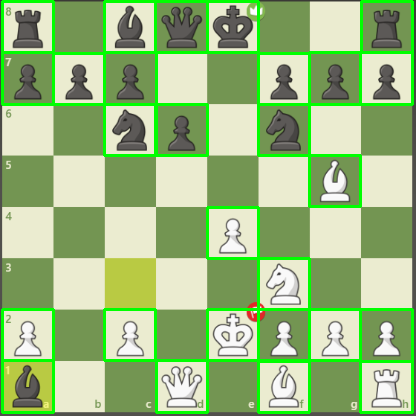

In [ ]:
from google.colab.patches import cv2_imshow
new_img = img.copy()
for box in results[0].boxes:
  # print(box)
  # print(box.xyxy.shape)
  x_min, y_min, x_max, y_max = box.xyxy[0]
  new_img = cv2.rectangle(new_img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)

cv2_imshow(new_img)

